In [6]:
#the spacy library - make sure to have dowloaded Spacy and the large dictionary
import spacy 
#Make sure to have dowloaded the large dictionary - command: python -m spacy download en_core_web_lg
nlp = spacy.load('en_core_web_lg') 

In [7]:
#the gender guesser Library
import gender_guesser.detector as gender
gender_det = gender.Detector()

In [8]:
#turn off the warnings
import warnings
warnings.filterwarnings("ignore")

In [9]:
import numpy as np
import re

In [10]:
#create the key words for the settings 
jungleTokens = nlp("jungle rainforest safari")
islandTokens = nlp("island hawaii bahamas")
woodsTokens = nlp("woods camping hike")
magicTokens = nlp("magic fairy wizard")
gardenTokens = nlp("garden flower bee")
nighttimeTokens = nlp("nighttime bedtime lullaby")
oceanTokens = nlp("ocean marine")
farmTokens = nlp("farm rooster harvest")
cityTokens = nlp("city metro urban")
futureTokens = nlp("futuristic technology astronaut")
houseTokens = nlp("house bedroom")
scaryTokens = nlp("scary monster terror")

In [11]:
#read the character files under the folder character_model
with open('character_model/animals.txt') as f: animal_entities = f.read().split()
with open('character_model/boy.txt') as f: boy_entities = f.read().split()
with open('character_model/cat.txt') as f: cat_entities = f.read().split()
with open('character_model/dog.txt') as f: dog_entities = f.read().split()
with open('character_model/fairy.txt') as f: fairy_entities = f.read().split()
with open('character_model/girl.txt') as f: girl_entities = f.read().split()
with open('character_model/monster.txt') as f: monster_entities = f.read().split()
with open('character_model/royalty.txt') as f: royalty_entities = f.read().split()
with open('character_model/superhero.txt') as f: superhero_entities = f.read().split()

In [12]:
#get Entity Function - 
#input: a word and a dataset containing a list of entities
#Outputs 1 if entity is in file, 0 otherwise
def getEntity(word, entities_list):
    if word.lower() in entities_list:
        return 1
    else:
        return 0

In [13]:
#get Similarity function for settings
#input: a word and nlp spacy tokens
#output: highest level of similarity between the word and the tokens (must be greater than the tunning)
def getSimilarity(word, tokens):
    #Small threshold value means more noise, value of .5 is standard
    threshold = .5
    #convert word to a token
    wordToken = nlp(word)[0]
    result = 0.0
    for token in tokens: 
        evaluation = token.similarity(wordToken)
        if evaluation > result and evaluation >= threshold:
            result = evaluation
    return result

In [14]:
# Guess gender
# Input: a full name
# Output: returns girl, boy or none if gender is undefined 
def guessGender(name):
    first = name.split()[0]
    guess = gender_det.get_gender(first)
    if guess == "female" or guess == "mostly_female":
        return "girl"
    elif guess == "male" or guess == "mostly_male":
        return "boy"
    else:
        return None

In [15]:
# Is Author Function
# Input: a full name, and the author's full name 
# Output: True if name is part of author's name; false otherwise
def isAuthor(name, author_):
    for n in name.split():
        if n in author_.split():
            return True
    return False

In [16]:
#takes a numpy vetor and normalizes it
def normalizeVector(v):
    norm=np.linalg.norm(v, ord=1)
    if norm==0:
        norm=np.finfo(v.dtype).eps
    return v/norm

In [17]:
def getSettingsVector(document):
    settings_vector = np.zeros(12)
    for token in document:
        if token.pos_ == "PROPN" or token.pos_ == "NOUN" : #or token.pos_ == "ADJ"
            #assigns values to the settings_vector
            settings_vector[0] += getSimilarity(token.lemma_, jungleTokens)
            settings_vector[1] += getSimilarity(token.lemma_, islandTokens)
            settings_vector[2] += getSimilarity(token.lemma_, woodsTokens)
            settings_vector[3] += getSimilarity(token.lemma_, magicTokens)
            settings_vector[4] += getSimilarity(token.lemma_, gardenTokens)
            settings_vector[5] += getSimilarity(token.lemma_, nighttimeTokens)
            settings_vector[6] += getSimilarity(token.lemma_, oceanTokens)
            settings_vector[7] += getSimilarity(token.lemma_, farmTokens)
            settings_vector[8] += getSimilarity(token.lemma_, cityTokens)
            settings_vector[9] += getSimilarity(token.lemma_, futureTokens)
            settings_vector[10] += getSimilarity(token.lemma_, houseTokens)
            settings_vector[11] += getSimilarity(token.lemma_, scaryTokens)
    return normalizeVector(settings_vector)
    

In [18]:
def getCharacterVector(document):
    character_vector = np.zeros(9)
    for token in document:
        if token.pos_ == "PROPN" or token.pos_ == "NOUN" : #or token.pos_ == "ADJ"
            character_vector[0] += getEntity(token.lemma_, animal_entities)
            character_vector[1] += getEntity(token.lemma_, boy_entities)
            character_vector[2] += getEntity(token.lemma_, cat_entities)
            character_vector[3] += getEntity(token.lemma_, dog_entities)
            character_vector[4] += getEntity(token.lemma_, fairy_entities)
            character_vector[5] += getEntity(token.lemma_, girl_entities)
            character_vector[6] += getEntity(token.lemma_, monster_entities)
            character_vector[7] += getEntity(token.lemma_, royalty_entities)
            character_vector[8] += getEntity(token.lemma_, superhero_entities)
    
    for entity in doc.ents:
        if entity.label_ == "PERSON":
            #do not account if it is the author
            if isAuthor(entity.text, author):
                continue
            #check gender
            personGender = guessGender(entity.text)
            if personGender == "boy":
                character_vector[1] += 1
            if personGender == "girl":
                character_vector[5] += 1
    return character_vector

In [19]:
#Here is the piece that reads the input file - adapt this piece of code in case you are
    #working with large files, like CSVs. You need to extract the description and author's name
    # from each cell of the csv

# Open the description file for analysis 
# Don't forget to input the author's name
# Note that files can occasionally have difficulty parsing quotation marks, so use encoding="utf8"
file = open("description.txt","r", encoding="utf8")
author = "J.K. Rowling"
rawText = file.read()
file.close()
print(author)
print(rawText)

J.K. Rowling
A global phenomenon and cornerstone of contemporary children’s literature, J.K. Rowling’s Harry Potter series is both universally adored and critically acclaimed. Now, experience the magic as you’ve never heard it before. The inimitable Jim Dale brings to life an entire cast of characters—from the pinched, nasal whine of Petunia Dursley to the shrill huff of the Sorting Hat to the earnest, wondrous voice of the boy wizard himself.
Orphaned as an infant, young Harry Potter has been living a less-than-fortunate life. Belittled by his pompous uncle and sniveling aunt (not to mention his absolute terror of a cousin, Dudley), Harry has resigned himself to a mediocre existence in the cupboard under the stairs. But then the letters start dropping on the doormat at Number Four, Privet Drive. Addressed to “Mr. H. Potter” and stamped shut with a purple wax seal, the peculiar envelopes are swiftly confiscated by his relentlessly cruel family. But nothing stops Rubeus Hagrid, a great 

In [20]:
#create the document 
doc = nlp(rawText)
#create the vector for the settings (this is the vector to be saved in the CSV file)
settings_vec = getSettingsVector(doc)
#create the vector for the characters (this is the vector to be saved in the CSV file)
character_vec = getCharacterVector(doc)

In [21]:
#the next function are just for plotting - not necessary for the vectors creation 
import matplotlib.pyplot as plt

In [22]:
#these functions is just for converting to dictionary for easy plotting 
def vector_to_dictionary_setting(vector):
    dic = {     "Jungle": vector[0],
                "Island": vector[1],
                "Woods": vector[2],
                "Magic": vector[3],
                "Garden": vector[4],
                "Nighttime": vector[5],
                "Ocean": vector[6],
                "Farm": vector[7],
                "City": vector[8],
                "Futuristic": vector[9],
                "House": vector[10],
                "Scary": vector[11]}
    return dic

def vector_to_dictionary_character(vector):
    dic = {     "Animal": vector[0],
                "Boy": vector[1],
                "Cat": vector[2],
                "Dog": vector[3],
                "Fairy": vector[4],
                "Girl": vector[5],
                "Monster": vector[6],
                "Royalty": vector[7],
                "Superhero": vector[8]}
    return dic

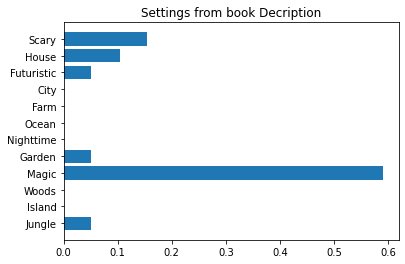

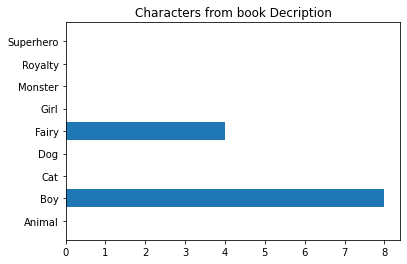

[0. 8. 0. 0. 4. 0. 0. 0. 0.]


In [24]:
#plot the settings
result_set = vector_to_dictionary_setting(settings_vec)
plt.barh(range(len(result_set)), list(result_set.values()), align='center')
plt.yticks(range(len(result_set)), list(result_set.keys()))
plt.title('Settings from book Decription')
plt.show()

#plot the Characters
result_char = vector_to_dictionary_character(character_vec)
plt.barh(range(len(result_char)), list(result_char.values()), align='center')
plt.yticks(range(len(result_char)), list(result_char.keys()))
plt.title('Characters from book Decription')
plt.show()

print(character_vec)